In [1]:
from read_diorisis import (
    MINDWORDS,
    count_occurences_of_mind_words,
    analyse_embedding_of_mind_words,   
    morpho_frequencies_of_mindwords,
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
mind_words_in_iliad = count_occurences_of_mind_words("Iliad", normalize=True)
mind_words_in_odyssey = count_occurences_of_mind_words("Odyssey", normalize=True)

number of distinct lemmata in Iliad: 111505
θυμός occurs 435 times in the Iliad. normalized: 390.12/100000 words
καρδία occurs 33 times in the Iliad. normalized: 29.60/100000 words
ψυχή occurs 33 times in the Iliad. normalized: 29.60/100000 words
ἦτορ occurs 48 times in the Iliad. normalized: 43.05/100000 words
ἔαρ occurs 2 times in the Iliad. normalized: 1.79/100000 words
φρήν occurs 178 times in the Iliad. normalized: 159.63/100000 words
νόος occurs 48 times in the Iliad. normalized: 43.05/100000 words
All mind-related words occur 777 times in Iliad. normalized: 696.83/100000 words
--------------------
number of distinct lemmata in Odyssey: 86971
θυμός occurs 322 times in the Odyssey. normalized: 370.24/100000 words
καρδία occurs 26 times in the Odyssey. normalized: 29.90/100000 words
ψυχή occurs 47 times in the Odyssey. normalized: 54.04/100000 words
ἦτορ occurs 47 times in the Odyssey. normalized: 54.04/100000 words
ἔαρ occurs 4 times in the Odyssey. normalized: 4.60/100000 words
φ

In [3]:
cooccurring_verbs_iliad = analyse_embedding_of_mind_words("Iliad")
cooccurring_verbs_odyssey = analyse_embedding_of_mind_words("Odyssey")

These are the 10 most correlated words with the mindword θυμός in the Iliad
1.: ἄρδω, pmi: 24.77
2.: ἀνέω, pmi: 24.77
3.: ἐξαίνυμαι, pmi: 24.77
4.: ἀποφθινύθω, pmi: 24.77
5.: ἐπιπνέω, pmi: 24.77
6.: κάπτω, pmi: 24.77
7.: ὑπαντιάω, pmi: 24.77
8.: σεβάζομαι, pmi: 24.77
9.: καταδίδωμι, pmi: 24.77
10.: μανθάνω, pmi: 24.77
11.: ἀκαχίζομαι, pmi: 24.77
--------------------
These are the 10 most correlated words with the mindword καρδία in the Iliad
1.: ἀναστεναχίζω, pmi: 28.49
2.: ἀλαλύκτημαι, pmi: 28.49
3.: μετοκλάζω, pmi: 28.49
4.: ἐπιτλῆναι, pmi: 28.49
5.: ἀτίζω, pmi: 28.49
6.: γλαυκιάω, pmi: 28.49
7.: ἐκκαλέω, pmi: 28.49
8.: οἰδάνω, pmi: 27.49
9.: ἀναρπάζω, pmi: 27.49
10.: μαστίω, pmi: 27.49
11.: πορφύρω, pmi: 27.49
--------------------
These are the 10 most correlated words with the mindword ψυχή in the Iliad
1.: παραβάλλω, pmi: 28.49
2.: καταδάπτω, pmi: 28.49
3.: καπύω, pmi: 28.49
4.: ἀλάλημαι, pmi: 28.49
5.: ῥυστάζω, pmi: 28.49
6.: περίκειμαι, pmi: 27.49
7.: χάζω, pmi: 26.90
8.: ταρχύω

In [4]:
morphos_mindword_iliad = morpho_frequencies_of_mindwords("Iliad")
morphos_mindword_odyssey = morpho_frequencies_of_mindwords("Odyssey")

Morphology variant counts of mindword ψυχή in Iliad:
nom/voc sg 14
acc sg 9
gen sg 5
acc pl 3
nom/voc pl 2
--------------------
Morphology variant counts of mindword θυμός in Iliad:
acc sg 189
nom sg 121
dat sg 117
gen sg 8
--------------------
Morphology variant counts of mindword φρήν in Iliad:
dat pl 98
acc pl 38
acc sg 29
nom/voc pl 12
nom/voc/acc dual 1
nom/voc sg 1
--------------------
Morphology variant counts of mindword νόος in Iliad:
nom sg 22
acc sg 20
dat sg 4
gen sg 2
--------------------
Morphology variant counts of mindword ἦτορ in Iliad:
voc sg 48
acc sg 48
nom sg 48
--------------------
Morphology variant counts of mindword καρδία in Iliad:
nom/voc sg 14
acc sg 11
dat sg 7
gen sg 1
--------------------
Morphology variant counts of mindword ἔαρ in Iliad:
gen sg 1
nom/voc/acc pl 1
--------------------
Morphology variant counts of mindword νόος in Odyssey:
acc sg 21
nom sg 19
dat sg 8
gen sg 6
acc pl 1
--------------------
Morphology variant counts of mindword θυμός in Od

[Text(0, 0.5, 'rel. frequency per 100000 words')]

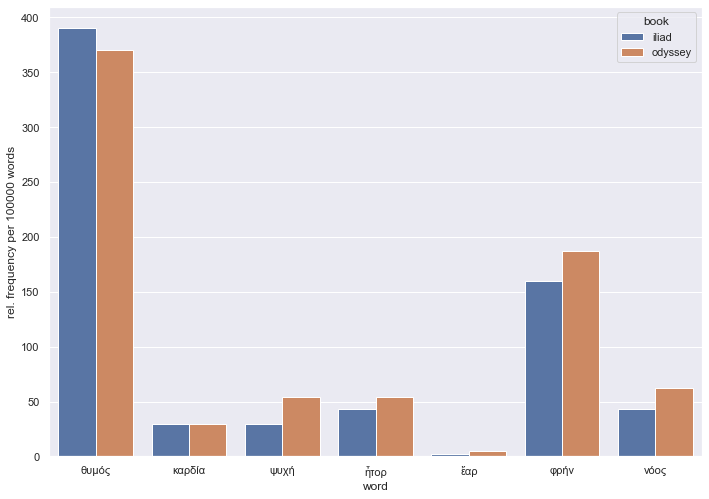

In [5]:
# visualize comparison of mindword occurences in iliad vs. odyssey
homer_df = []
for mw, freq in mind_words_in_iliad.items():
    homer_df.append({'frequency': freq, "word": mw, "book":"iliad"})
for mw, freq in mind_words_in_odyssey.items():
    homer_df.append({'frequency': freq, "word": mw, "book":"odyssey"})
homer_df = pd.DataFrame.from_records(homer_df)
sns.barplot(data=homer_df, x="word", y="frequency", hue="book").set(ylabel="rel. frequency per 100000 words")

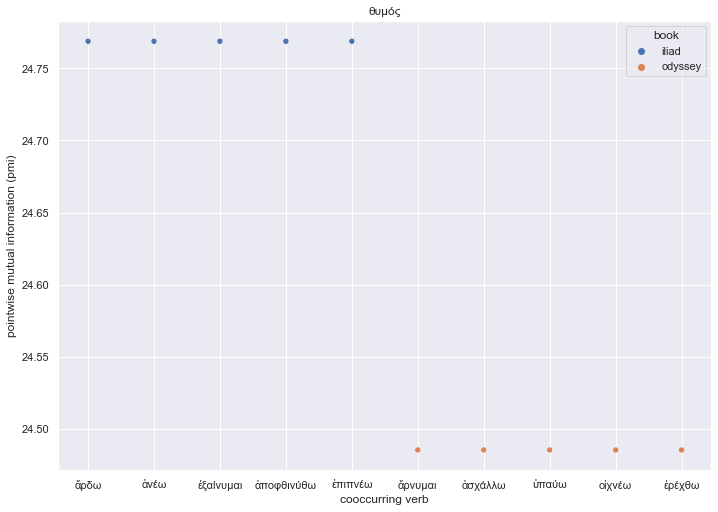

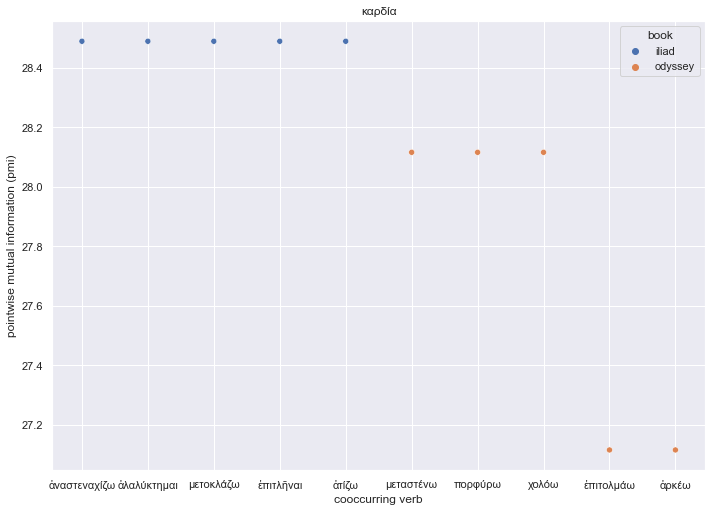

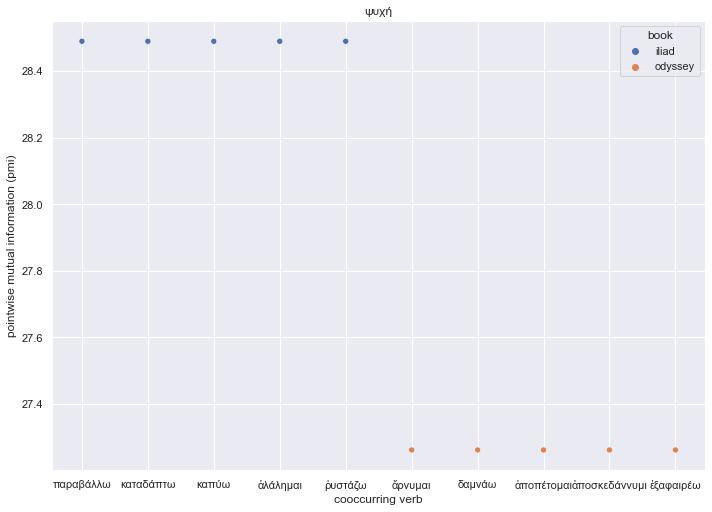

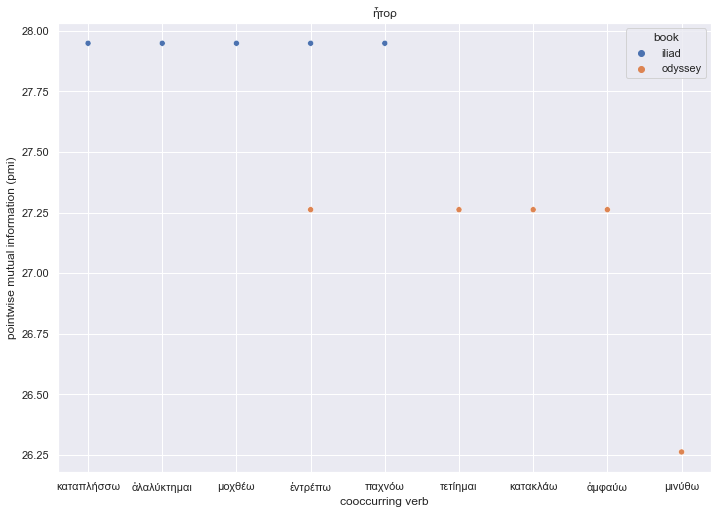

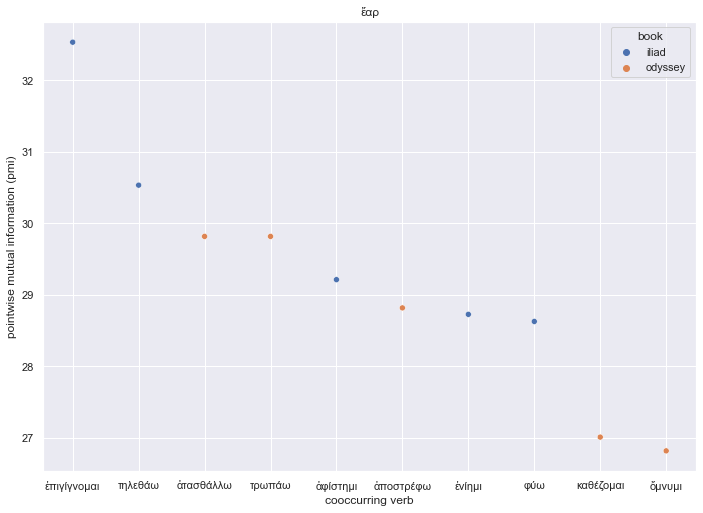

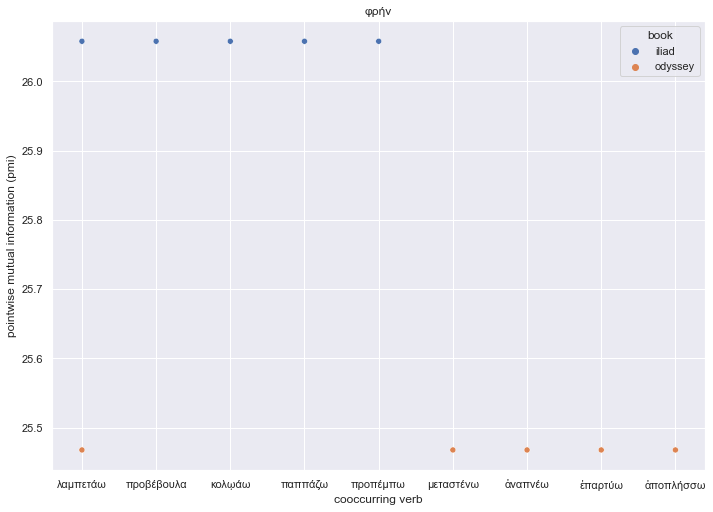

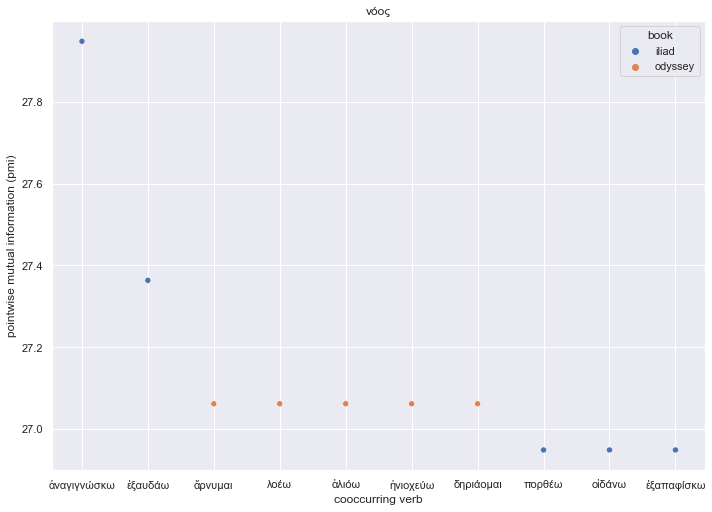

<Figure size 842.4x595.44 with 0 Axes>

In [6]:
df_verbs = {}
for mw in cooccurring_verbs_odyssey:
    records = []
    records += [data + (mw, 'odyssey') for data in cooccurring_verbs_odyssey[mw][:5]]
    records += [data + (mw, 'iliad') for data in cooccurring_verbs_iliad[mw][:5]]

    df = pd.DataFrame.from_records(sorted(records, key=lambda x:x[1], reverse=True),
        columns=['cooccurring_word', 'pmi', 'mindword', 'book']
    )
    g = sns.scatterplot(data=df, x="cooccurring_word", y="pmi", hue="book").set(
        xlabel="cooccurring verb",
        ylabel="pointwise mutual information (pmi)",
        title=f"{mw}"
    )
    plt.figure()


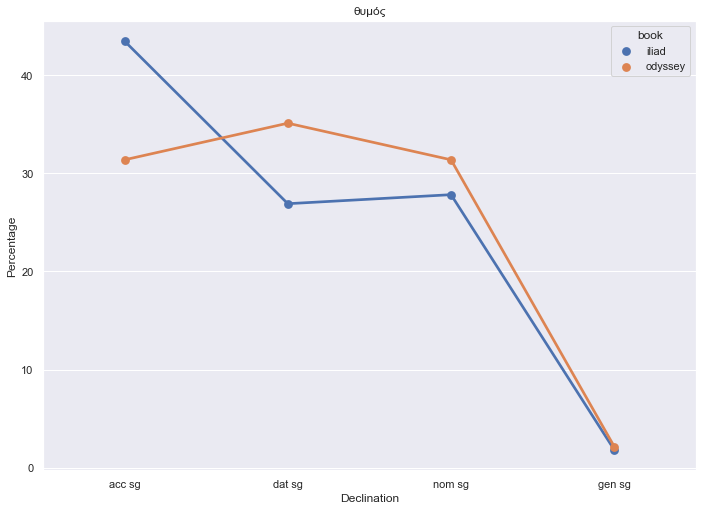

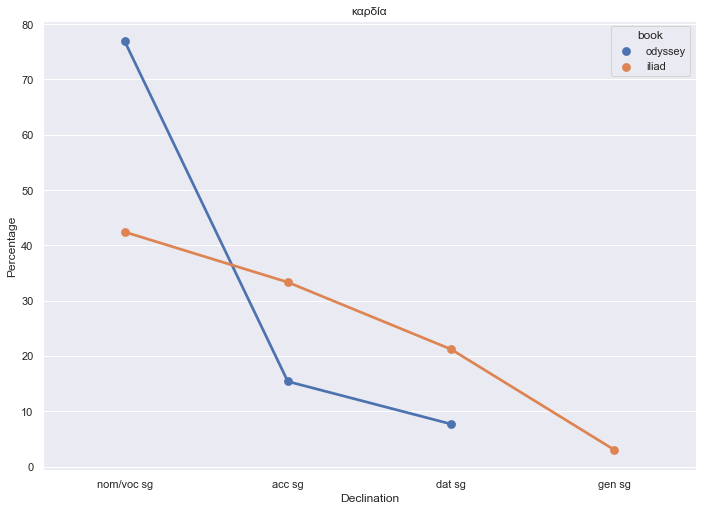

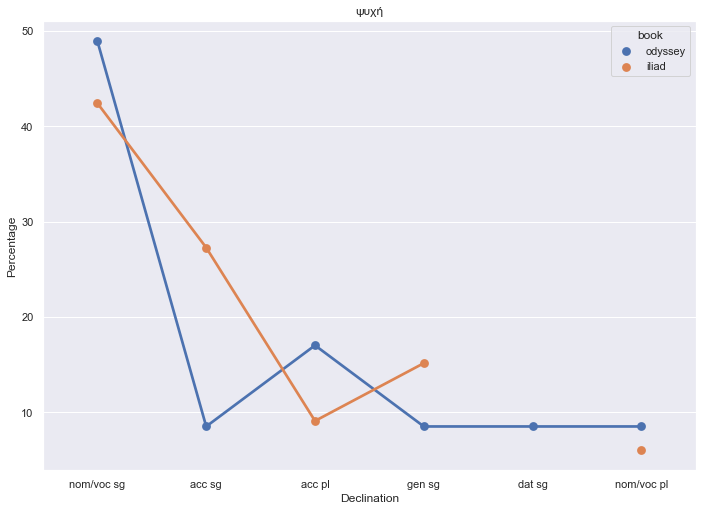

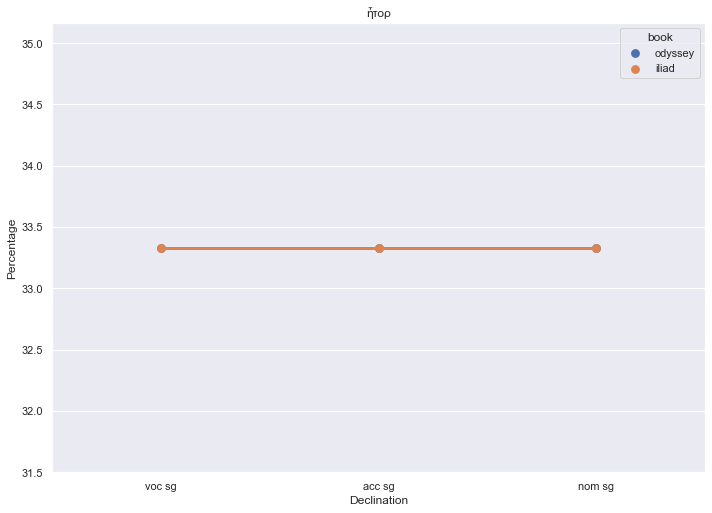

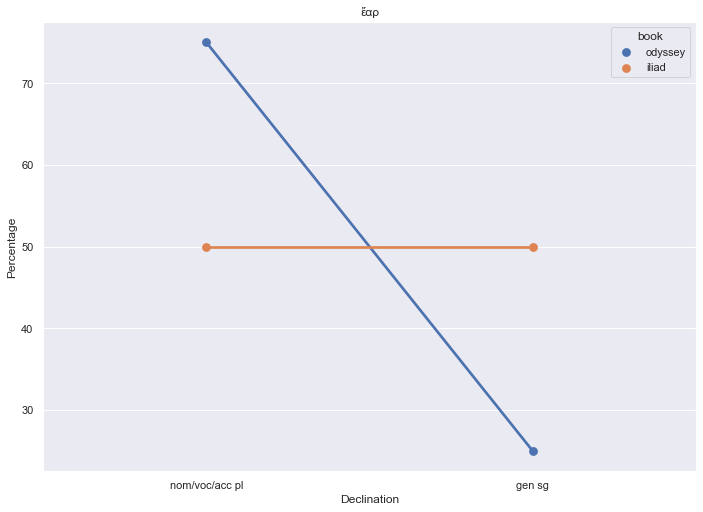

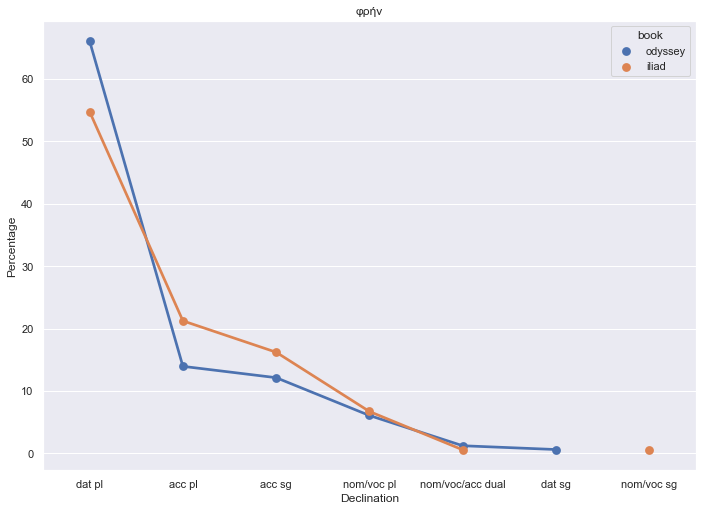

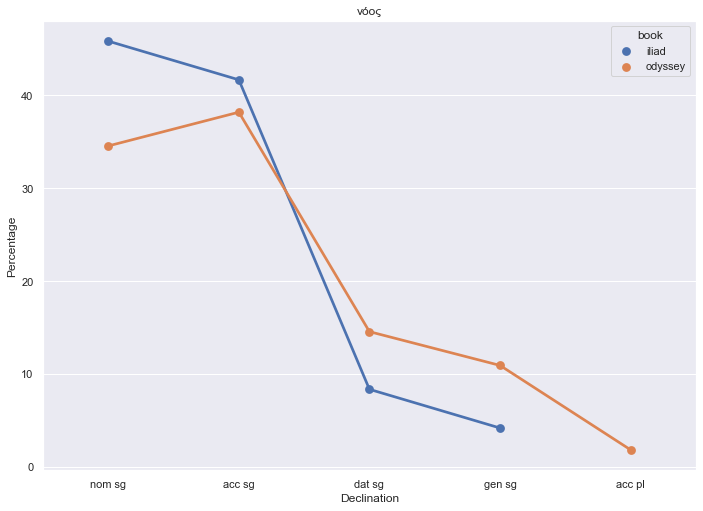

<Figure size 842.4x595.44 with 0 Axes>

In [7]:
df_verbs = {}
for mw in MINDWORDS:
    records = []
    tot_iliad = sum(morphos_mindword_iliad[mw].values())
    tot_odyssey = sum(morphos_mindword_odyssey[mw].values())
    records += [(morpho, freq/tot_odyssey*100, mw, 'odyssey') for morpho,freq in morphos_mindword_odyssey[mw].items()]
    records += [(morpho, freq/tot_iliad*100, mw, 'iliad') for morpho,freq in morphos_mindword_iliad[mw].items()]

    df = pd.DataFrame.from_records(sorted(records, key=lambda x:x[1], reverse=True),
        columns=['morpho', 'frequency', 'mindword', 'book']
    )
    g = sns.pointplot(data=df, x="morpho", y="frequency", hue="book").set(
        xlabel="Declination",
        ylabel="Percentage",
        title=f"{mw}"
    )
    plt.figure()